# Linear Regression of Sales Data

## 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

from math import sqrt

In [2]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(12,10)})

In [3]:
raw_data = pd.read_csv('marketing raw.csv')
raw_data

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875,No Promo
181,09/05/2021,20.0,61.0,5.0,17.0,2021.0,Sunday,1303.0,3861.0,871.000,No Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Preprocessing

### 2.1 Exploratory Data Analysis

In [4]:
raw_data.shape

(185, 11)

In [5]:
raw_data.dtypes

Date                object
Week               float64
Week_ID            float64
Month              float64
Month_ID           float64
Year               float64
Day_Name            object
Visitors           float64
Revenue            float64
Marketing Spend    float64
Promo               object
dtype: object

In [6]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [7]:
raw_data.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [8]:
raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
raw_data.dropna(inplace=True)
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [10]:
raw_data.shape

(182, 11)

In [11]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_vals = len(unique_vals)
    if nr_vals < 11:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "Date" are 182
The number of values in features "Week" are 28
The number of values in features "Week_ID" are 28
The number of values in features "Month" are 7; [1.000000 2.000000 3.000000 4.000000 5.000000 11.000000 12.000000]
The number of values in features "Month_ID" are 7; [11.000000 12.000000 13.000000 14.000000 15.000000 16.000000 17.000000]
The number of values in features "Year" are 2; [2020.000000 2021.000000]
The number of values in features "Day_Name" are 7; ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values in features "Visitors" are 175
The number of values in features "Revenue" are 181
The number of values in features "Marketing Spend" are 182
The number of values in features "Promo" are 3; ['No Promo' 'Promotion Blue' 'Promotion Red']


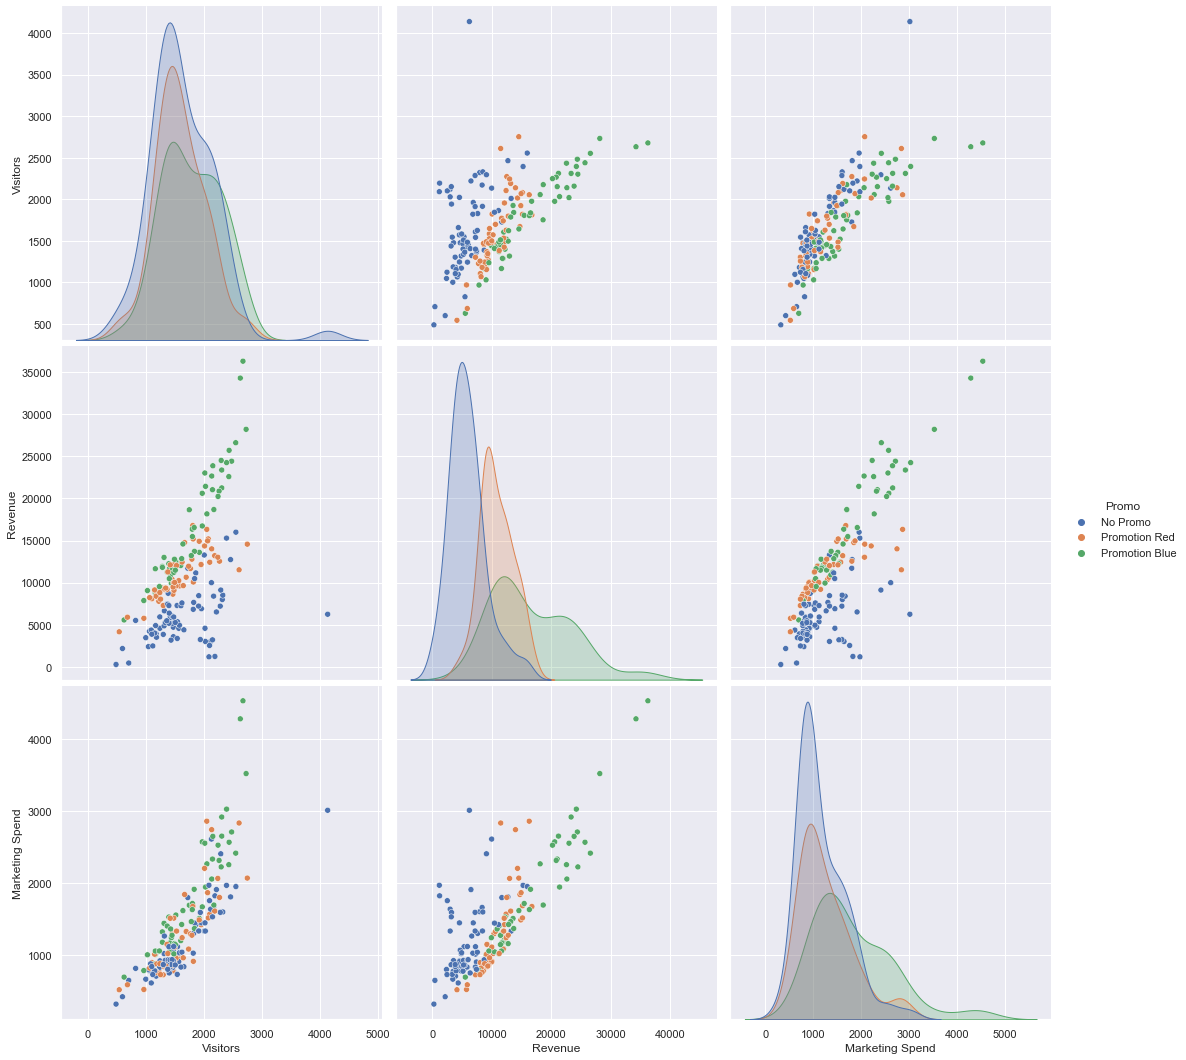

In [12]:
visual = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue='Promo', height=5)

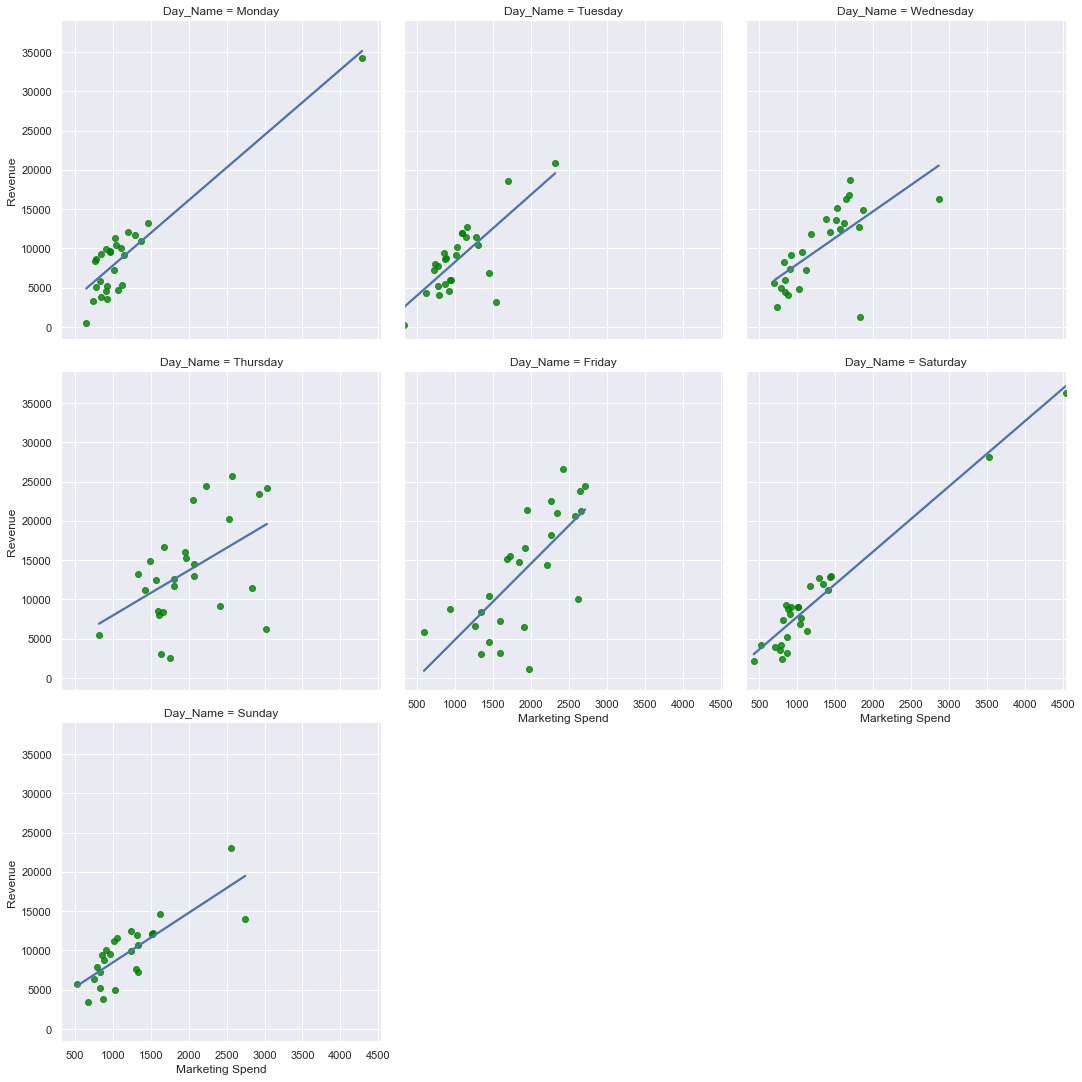

In [13]:
visual_2 = sns.lmplot(x='Marketing Spend', y='Revenue', data=raw_data, col='Day_Name', col_wrap=3, scatter_kws={'color':'green'}, ci=False)

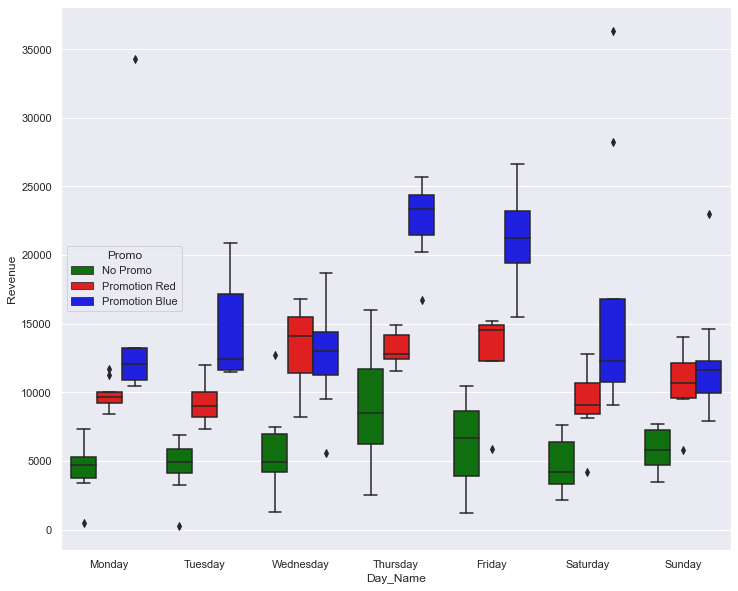

In [14]:
visual_3 = sns.boxplot(x='Day_Name', y='Revenue', data=raw_data, hue='Promo', palette=['green', 'red', 'blue'])

### 2.2 Data Cleaning

Remove outliers seen in the boxplot i.e. around >27000

In [15]:
raw_data[raw_data['Revenue'] > 27000]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
14,23/11/2020,48.0,36.0,11.0,11.0,2020.0,Monday,2632.0,34278.0,4284.750,Promotion Blue
47,26/12/2020,52.0,40.0,12.0,12.0,2020.0,Saturday,2678.0,36283.0,4535.375,Promotion Blue
124,13/03/2021,11.0,52.0,3.0,15.0,2021.0,Saturday,2732.0,28196.0,3524.500,Promotion Blue


In [16]:
raw_data = raw_data[raw_data['Revenue'] < 27000]

In [17]:
raw_data.shape

(179, 11)

Get rid of columns that are useless

In [18]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [19]:
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [20]:
# turns the categorical data (objects) into numerical data that can be used for ML model
new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])
new_raw_data

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,7284.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,13021.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,4587.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,5927.0,1121.875000,1,0,0,0,0,1,0,0,0,0


### 2.3 Feature Selection

In [21]:
# running correlation between numerical continuous columns
correlation = new_raw_data[['Visitors', 'Revenue', 'Marketing Spend']].corr()
correlation

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.531602,0.837313
Revenue,0.531602,1.000000,0.725675
Marketing Spend,0.837313,0.725675,1.000000


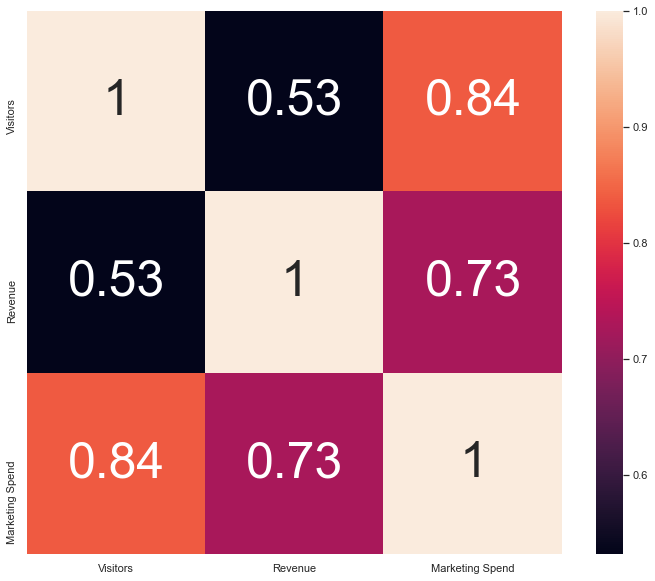

In [22]:
# heat map to visualise correlation
heatmap = sns.heatmap(correlation, annot=True, annot_kws={'size':50})

Run feature importance

In [39]:
# Revenue is the dependent variable, so remove it when categorising the independent variable
X = new_raw_data.drop('Revenue', axis=1)
y = new_raw_data['Revenue']
print(x.shape)
print(y.shape)

(179, 12)
(179,)


In [40]:
X.head()

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500,1,0,0,1,0,0,0,0,0,0


In [25]:
y.head()

0      465.0
1    10386.0
2    12475.0
3    11712.0
4    10000.0
Name: Revenue, dtype: float64

In [41]:
# to pass data into an algorithm, make x into values
X = X.values

In [42]:
# run a decision tree
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [43]:
# running feature imprtance
for index, column in enumerate(new_raw_data.drop('Revenue', axis=1)):
    print(f'The feature importance for {column} is {round(dt.feature_importances_[index], 3)}')

The feature importance for Visitors is 0.332
The feature importance for Marketing Spend is 0.438
The feature importance for Promo_No Promo is 0.032
The feature importance for Promo_Promotion Blue is 0.047
The feature importance for Promo_Promotion Red is 0.045
The feature importance for Day_Name_Friday is 0.013
The feature importance for Day_Name_Monday is 0.014
The feature importance for Day_Name_Saturday is 0.013
The feature importance for Day_Name_Sunday is 0.016
The feature importance for Day_Name_Thursday is 0.02
The feature importance for Day_Name_Tuesday is 0.017
The feature importance for Day_Name_Wednesday is 0.013


## 2. Splitting data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=15)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 12) (36, 12) (143,) (36,)


## 3. Linear Regression Model

In [48]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

## 4. Evaluating the Model

In [73]:
# accuracy of training dataset
print(f'The accuracy of the training dataset is : {lm.score(X_train, y_train)}')

The accuracy of the training dataset is : 0.791949990505602


In [74]:
# predicted values for the X training
y_pred = lm.predict(X_train)

In [75]:
# r2 score for accuracy
print(f'The accuracy (r2) of the training dataset is : {r2_score(y_train, y_pred)}')

The accuracy (r2) of the training dataset is : 0.791949990505602


In [76]:
# check accuracy on unseen data
print(f'The accuracy of the testing dataset is : {lm.score(X_test, y_test)}')

The accuracy of the testing dataset is : 0.751190386538668


In [77]:
# the root mean squared (RMS) error
print(f'The RMS error of the training dataset is : {sqrt(mean_squared_error(y_train, y_pred))}')

The RMS error of the training dataset is : 2618.561282656437


In [78]:
# RMS error using the X test
print(f'The RMS error of the testing dataset is : {sqrt(mean_squared_error(y_test, lm.predict(X_test)))}')

The RMS error of the testing dataset is : 2340.4200873490113


In [79]:
# Mean absolute error
print(f'The mean absolute error of the training dataset is : {mean_absolute_error(y_train, y_pred)}')

The mean absolute error of the training dataset is : 1928.0670665528867


In [80]:
# Mean absolute error testing
print(f'The mean absolute error of the testing dataset is : {mean_absolute_error(y_test, lm.predict(X_test))}')

The mean absolute error of the testing dataset is : 1692.3835577162292


In [82]:
# coefficients
print(f'The coefficient is : {lm.coef_}')

The coefficient is : [0.972169 3.695615 -4295.876540 3724.690590 571.185949 738.005738
 -352.308895 -902.241594 -155.867567 814.821481 150.084913 -292.494076]


In [84]:
# y intercept
print(f'y-intercept : {lm.intercept_}')

y-intercept : 4060.6503664996926


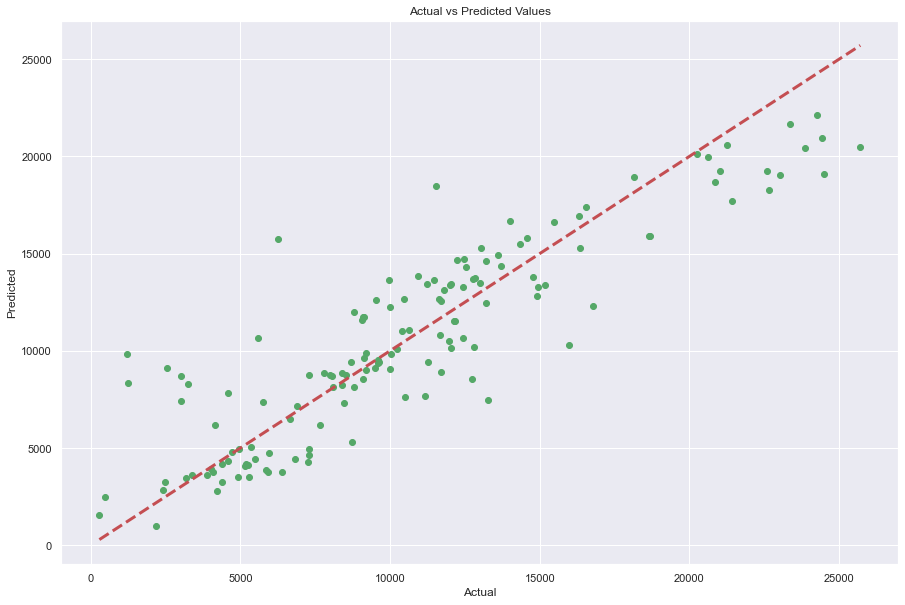

In [94]:
# plot a graph of actual vs predicted values
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, c='g')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='r', lw=3) # shows correct prediction i.e. when actual = precicted
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


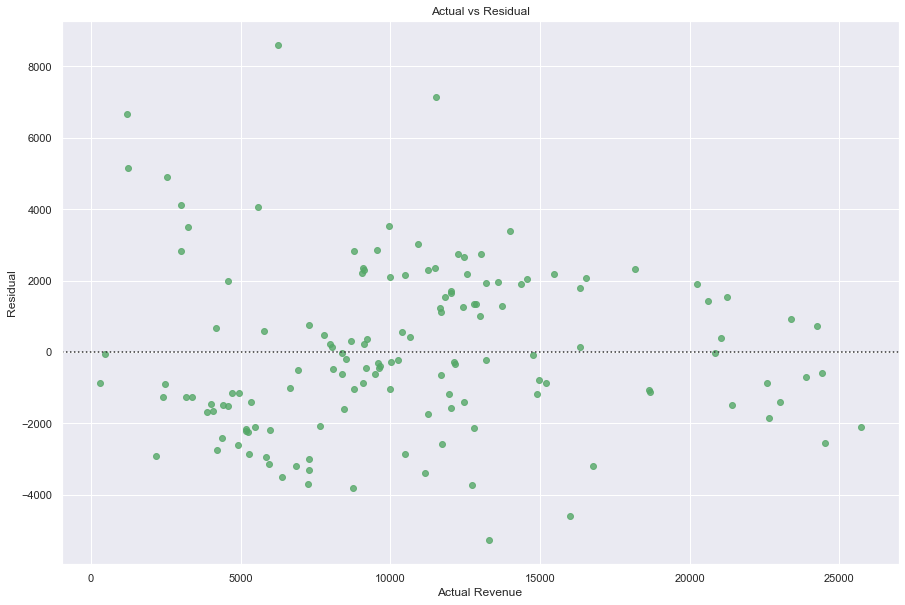

In [93]:
# plot a graph of actual vs predicted values
plt.figure(figsize=(15,10))
sns.residplot(y_train, y_pred, color='g')
plt.xlabel('Actual Revenue')
plt.ylabel('Residual')
plt.title('Actual vs Residual')
plt.show()

## 5. Predictions using LRM

In [95]:
# pass coefficient into table
Coeff = lm.coef_

In [96]:
Coeff.shape

(12,)

In [99]:
Coeff = Coeff.reshape(-1,12)
Coeff.shape

(1, 12)

In [101]:
X2 = new_raw_data.drop('Revenue', axis=1)
X2.columns

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

In [104]:
Coeff_df = pd.DataFrame(Coeff, columns=[X2])
Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [111]:
Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# prediction: y = a + bx ..
pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)

In [112]:
print(f'The predicted revenue is : {pred1}')

The predicted revenue is : [31625.267850]
